<a href="https://colab.research.google.com/github/stefkong1982/netology.ru/blob/Master/Statistika_v_Python/Kejs_stadi/DZ_Kondratev_STPY-48_stat_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

### Решение Задания 1

### импорт библиотек

In [58]:
# импорт библиотек
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

### Загружаем данные

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Kejs_stadi/vgsales.csv')
# Загружаем данные
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### 1) Как критики относятся к спортивным играм?

* H0: Средняя оценка критиков по спортивным играм равна средней оценке критиков по всем играм.
* H1: Средняя оценка критиков по спортивным играм отличается от средней оценки критиков по всем играм.

Результаты t-теста для спортивных игр и всех игр:
t-статистика: 6.950167570249341
p-значение: 3.8930663808129205e-12
Отклоняем нулевую гипотезу. Средняя оценка критиков по спортивным играм больше средней оценки критиков по всем играм.


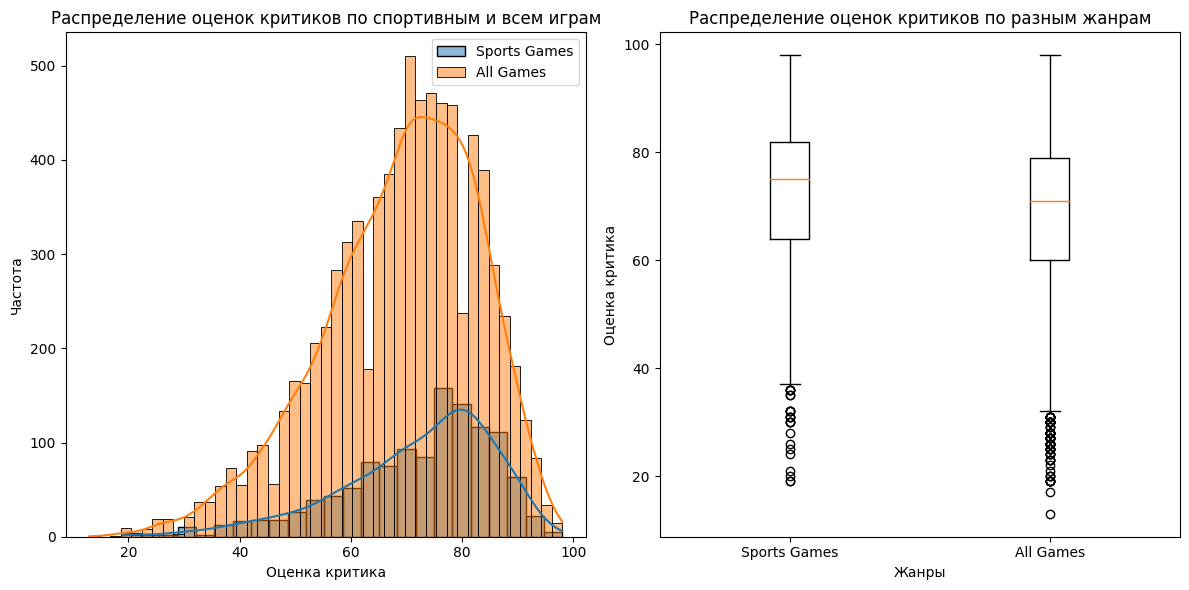


Базовые статистики спортивных игр:
count    1194.000000
mean       71.968174
std        13.878433
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: Critic_Score, dtype: float64

Базовые статистики всех игр:
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: Critic_Score, dtype: float64


In [60]:
# Выборка данных по спортивным играм
sports_games = df[df['Genre'] == 'Sports']['Critic_Score'].dropna()

# Выборка данных по всем играм
all_games = df['Critic_Score'].dropna()

# Проведение t-теста
t_statistic, p_value = stats.ttest_ind(sports_games, all_games)

# Вывод результатов
print('Результаты t-теста для спортивных игр и всех игр:')
print('t-статистика:', t_statistic)
print('p-значение:', p_value)

# Статистический вывод
alpha = 0.05
if p_value < alpha:
    if t_statistic < 0:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по спортивным играм меньше средней оценки критиков по всем играм.')
    else:
        print('Отклоняем нулевую гипотезу. Средняя оценка критиков по спортивным играм больше средней оценки критиков по всем играм.')
else:
    print('Принимаем нулевую гипотезу. Средняя оценка критиков по спортивным играм равна средней оценке критиков по всем играм.')

# Создаем список данных для boxplot
data = [sports_games, all_games]

# Создаем список меток для оси x
labels = ['Sports Games', 'All Games']

# Создание гистограмм и кривых плотности
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(sports_games, kde=True, label='Sports Games')
sns.histplot(all_games, kde=True, label='All Games')
plt.xlabel('Оценка критика')
plt.ylabel('Частота')
plt.title('Распределение оценок критиков по спортивным и всем играм')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(data, labels=labels)
plt.xlabel('Жанры')
plt.ylabel('Оценка критика')
plt.title('Распределение оценок критиков по разным жанрам')

# Отображение графиков
plt.tight_layout()
plt.show()

# Принт базовых статистик
print('\nБазовые статистики спортивных игр:')
print(sports_games.describe())

print('\nБазовые статистики всех игр:')
print(all_games.describe())

Из результатов `t-теста` для спортивных игр и всех игр следует:

1. Очень маленькое значение p-значения (3.8930663808129205e-12) говорит о том, что есть статистически значимая разница между оценками критиков для спортивных игр и всех игр.
2. Значение t-статистики (6.950167570249341) показывает, что средняя оценка критиков для спортивных игр значительно выше, чем для всех игр.

Базовые статистики подтверждают эту разницу:
- Для спортивных игр (count=1194): средняя оценка критиков - 71.97, стандартное отклонение - 13.88.
- Для всех игр (count=8137): средняя оценка критиков - 68.97, стандартное отклонение - 13.94.

Исходя из распределения, можно сделать вывод, что спортивные игры имеют немного более высокие оценки критиков по сравнению с общими играми. Оба распределения оценок критиков, как для спортивных игр, так и для всех игр, имеют схожие характеристики и являются приближенными к нормальному распределению. Это означает, что большинство оценок сконцентрированы вокруг среднего значения, а разница между ними может быть объяснена случайными факторами или другими влияниями..

При сравнении распределений оценок критиков медиана может быть более надежным показателем для определения наличия разницы между группами. В данном случае медиана для спортивных игр равна 75, а для всех игр - 71, что также указывает на то, что спортивные игры имеют более высокие оценки критиков.

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

### импорт библиотек

In [61]:
# импорт библиотек
import glob
import pandas as pd
import re

### Загружаем данные

In [62]:
data = pd.read_csv('https://raw.githubusercontent.com/stefkong1982/netology.ru/Master/Statistika_v_Python/Kejs_stadi/spam.csv')
# Загружаем данные
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Приведение текста к нижнему регистру

In [63]:
# Приведение текста к нижнему регистру
data['Message'] = data['Message'].str.lower()
data

,Category,Message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


### Удаление мусорных символов

In [64]:
# Удаление мусорных символов
for i in range(len(data['Message'])):
    data['Message'][i] = re.sub(r'[^a-zA-Zа-яА-Я0-9\s]', '', data['Message'][i])
data

,Category,Message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will b going to esplanade fr home
5569,ham,pity was in mood for that soany other suggest...
5570,ham,the guy did some bitching but i acted like id ...


### Удаление стоп-слов

In [65]:
# Удаление стоп-слов
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)

stop_words = set(stopwords.words('english'))

filtered_text = []

for text in data['Message']:
    words = text.split()
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    filtered_text.append(' '.join(filtered_words))

data['Message'] = filtered_text
data

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestions
5570,ham,guy bitching acted like id interested buying s...


### Приведение слов к нормальной форме

In [66]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4', quiet=True)
nltk.download('wordnet', quiet=True)

lemmatizer = WordNetLemmatizer()
lemmatized_text = []

for text in data['Message']:
    words = text.split()
    lemmatized_words = []
    for word in words:
        lemmatized_word = lemmatizer.lemmatize(word)
        lemmatized_words.append(lemmatized_word)
    lemmatized_text.append(' '.join(lemmatized_words))

data['Message'] = lemmatized_text
data

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think go usf life around though
...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,b going esplanade fr home
5569,ham,pity mood soany suggestion
5570,ham,guy bitching acted like id interested buying s...


### Преобразование сообщений в вектора TF-IDF

In [67]:
# Преобразование сообщений в вектора TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data.Message)
names = tfidf.get_feature_names_out()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
tfidf_matrix

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zebra,zed,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Разделение данных на тестовую и тренировочную выборки

In [68]:
# Разделение данных на тестовую и тренировочную выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, data.Category, test_size=0.3, random_state=42)

In [69]:
y_train

708     ham
4338    ham
5029    ham
4921    ham
2592    ham
       ... 
3772    ham
5191    ham
5226    ham
5390    ham
860     ham
Name: Category, Length: 3900, dtype: object

In [70]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: Category, Length: 1672, dtype: object

### Построение модели логистической регрессии

In [71]:
# Построение модели логистической регрессии
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

### Оценка точности модели на тестовых данных

In [72]:
# Оценка точности модели на тестовых данных
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9539473684210527


Модель достигла точности 95.4% на тестовых данных, что говорит о её способности довольно точно предсказывать, является ли сообщение спамом или нет.

### Создание confusion matrix

In [73]:
# Создание confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

Confusion matrix:
[[1444    4]
 [  73  151]]


Верно классифицировано:
- 1444 сообщений, которые являются неспамом и были правильно классифицированы как неспам.
- 151 сообщений, которые являются спамом и были правильно классифицированы как спам.

Неверно классифицировано:
- 4 сообщения, которые являются неспамом, но были ошибочно классифицированы как спам.
- 73 сообщения, которые являются спамом, но были ошибочно классифицированы как неспам.

Вывод:

Модель показывает высокую точность и может быть использована для классификации сообщений как спам или неспам с высокой достоверностью. Однако, она делает некоторое количество ошибок, классифицируя некоторые неспамовые сообщения как спам и наоборот.

### Создание датафрейма с неправильно классифицированными сообщениями

In [74]:
misclassified_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
misclassified_df = misclassified_df[misclassified_df['Actual'] != misclassified_df['Predicted']]
misclassified_df['Message'] = data.loc[misclassified_df.index, 'Message']
misclassified_df = misclassified_df.reset_index(drop=True)
print("Misclassified messages:")
misclassified_df

Misclassified messages:


,Actual,Predicted,Message
0,ham,spam,hey free call
1,spam,ham,reminder downloaded content already paid goto ...
2,spam,ham,guess somebody know secretly fancy wanna find ...
3,spam,ham,oh god ive found number im glad text back xaft...
4,spam,ham,next amazing xxx picsfree1 video sent enjoy on...
...,...,...,...
72,spam,ham,unique enough find 30th august wwwareyouunique...
73,spam,ham,freemsg hi baby wow got new cam moby wanna c h...
74,spam,ham,important customer service announcement premier
75,ham,spam,free nowcan call


Этот код создает датафрейм `misclassified_df` содержащий информацию об ошибках классификации модели. В нем есть следующие столбцы:
- `Actual` - фактическая категория сообщения (из тестовой выборки)
- `Predicted` - предсказанная моделью категория сообщения
- `Message` - текст сообщения

Сначала создается пустой датафрейм, где столбцы `Actual` и `Predicted` заполняются фактическими и предсказанными категориями соответственно. Затем в этом датафрейме оставляются только строки, где фактическая и предсказанная категории не совпадают.

Далее в датафрейме создается столбец `Message`, в котором содержится текст ошибочно классифицированного сообщения. Для этого используется функция `loc`, которая возвращает значения из столбца `Message` в исходных данных (`data`) по индексам строк, которые остались в `misclassified_df`.

Наконец, индексы в `misclassified_df` переиндексируются с помощью `reset_index`(`drop=True`), чтобы они шли последовательно от 0 до N-1, где N - количество ошибочно классифицированных сообщений.

Выводится датафрейм `misclassified_df` с текстом ошибочно классифицированных сообщений.

в количестве 77 строк (4 +73):
```
Confusion matrix:
[[1444    4]
 [  73  151]]
```